In [16]:
import pandas as pd

def load_data(url):
    # read csv from github url
    # return pandas dataframe
    df = pd.read_csv(url)
    return df

url = 'https://raw.githubusercontent.com/prathikr/CS_499_Final_Project/master/BISTRA_GROUP_PROJECT_SMALL.csv'
df = load_data(url)
df.head(5)

,ID,female,nonwhite,unemplmt,primsev,B2a_0,State,City,zipcode,noins,...,Any_Cens,Alcohol_Cens,Binge_Cens,Marijuana_Cens,Illicit_Cens,Any_Days,Alcohol_Days,Binge_Days,Marijuana_Days,Illicit_Days
0,9048,0,0,0,4,17,VA,Lynchburg,24501-1114,0,...,2,2,2,2,2,192,192,192,192,192
1,9152,0,0,0,1,18,VA,Lynchburg,24501-1114,0,...,2,2,2,2,2,176,176,176,176,176
2,9057,0,0,1,3,16,VA,Lynchburg,24501-1114,0,...,0,0,2,0,2,21,21,365,81,365
3,9139,0,0,0,3,16,VA,Lynchburg,24501-1114,0,...,0,2,0,0,2,20,365,0,20,365
4,9051,0,1,0,3,17,VA,Lynchburg,24501-1114,0,...,0,0,0,0,1,14,30,30,14,356


In [17]:
def trim_predictors(df, predictor_col_name, cols_to_drop):
    # extract nx1 vector for predictor and drop all other potential predictors
    # display(df.columns)
    print("Original df:", df.shape)
    Y = df[predictor_col_name]
    print("Predictor column:", Y.shape)
    df.drop(columns=cols_to_drop, inplace=True) # gotta keep inplace=True here or else code breaks!! idk why...
    df = df[df.primsev != 3] # leaves only marijuana drug abusers in dataframe
    print("Post-extracting predictor column and removing other predictors:", df.shape)
    # return extracted predictor values
    return Y

Y = trim_predictors(df, 'Marijuana_Days', ['State', 'City', 'zipcode', 'agyaddr', 'SFS8p_0', 'SFS8p_3', 'SFS8p_6', 
'SFS8p_12', 'ada_0','ada_3','ada_6','ada_12','S2c1_0','S2c1_3','S2c1_6','S2c1_12','S2b1_0','S2b1_3','S2b1_6',
'S2b1_12','S2z1_3','S2z1_6','S2z1_12','S2z2_3','S2z2_6','S2z2_12','S2z3_3','S2z3_6','S2z3_12','S2z4_3','S2z4_6',
'S2z4_12','S2z5_3','S2z5_6','S2z5_12','Any_Cens','Alcohol_Cens','Binge_Cens','Marijuana_Cens','Illicit_Cens',
'Any_Days','Binge_Days','Alcohol_Days','Illicit_Days', 'Marijuana_Days'])
print(df.columns)

Original df: (26556, 110)
Predictor column: (26556,)
Post-extracting predictor column and removing other predictors: (12349, 65)
Index(['ID', 'female', 'nonwhite', 'unemplmt', 'primsev', 'B2a_0', 'noins',
       'prsatx', 'tottxp4', 'TRI_0', 'GVS', 'E9a', 'E9b', 'E9c', 'E9d', 'E9e',
       'E9e18', 'E9f', 'E9g', 'E9h', 'E9j', 'E9k', 'E9m', 'tsd_0', 'und15',
       'CWS_0', 'IPI', 'L5', 'SPSy_0', 'RFQ33c', 'GSSI_0', 'S9y10', 'dldiag',
       'press', 'DSS9_0', 'ADHDs_0', 'CDS_0', 'suicprbs_0', 'CJSI_0', 'LRI7_0',
       'SRI7_0', 'ERS21_0', 'homeless_0', 'S6', 'PSSI_0', 'RERI13p_0', 'ncar',
       'loc', 'engage30', 'engage42', 'init', 'S7e4_0', 'POPIgrp', 'FIS4p_0',
       'HIVrisk', 'txtypeg', 'SDScrY', 'totttld', 'POS_0', 'AFSS_0', 'S2x_0',
       'SPSm_0', 'E14a_0', 'E14b_0', 'EPS7p_0'],
      dtype='object')


In [18]:
import numpy as np
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

def replace_NaN_columns(df):
    # replace all -999 with NaN inplace
    df = df.replace(to_replace = -999, value = np.nan)
    
    # calculate percentage of NaNs in each column
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    third = int(round(len(missing_value_df) / 3))
    display_side_by_side(missing_value_df[0:third], missing_value_df[third:third*2], missing_value_df[third*2:len(missing_value_df)])
    
    # drop columns with > 25% inplace
    cols = []
    for index, row in missing_value_df.iterrows():
        if row['percent_missing'] > 25:
          cols.append(row['column_name'])
    df.drop(columns=cols, inplace=True)
    print("columns dropped:", cols)
    print("new df shape:", df.shape)
    print(df.describe())
    return df
    
df = drop_NaN_columns(df)

,column_name,percent_missing
ID,ID,0.000000
female,female,0.003766
nonwhite,nonwhite,0.030125
unemplmt,unemplmt,0.176984
primsev,primsev,0.015063
B2a_0,B2a_0,0.000000
noins,noins,57.327911
prsatx,prsatx,0.301250
tottxp4,tottxp4,0.000000
TRI_0,TRI_0,1.276548


columns dropped: ['noins', 'E9e', 'RFQ33c', 'GSSI_0', 'press', 'PSSI_0', 'RERI13p_0', 'POPIgrp', 'FIS4p_0']
new df shape: (26556, 56)
                 ID        female      nonwhite      unemplmt       primsev  \
count  26556.000000  26555.000000  26548.000000  26509.000000  26552.000000   
mean   13278.500000      0.279458      0.629953      0.209476      2.673848   
std     7666.201211      0.448741      0.482826      0.406942      1.156854   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%     6639.750000      0.000000      0.000000      0.000000      2.000000   
50%    13278.500000      0.000000      1.000000      0.000000      3.000000   
75%    19917.250000      1.000000      1.000000      0.000000      3.000000   
max    26556.000000      1.000000      1.000000      1.000000      6.000000   

              B2a_0        prsatx       tottxp4         TRI_0           GVS  \
count  26556.000000  26476.000000  26556.000000  26217.000000  26506.000000

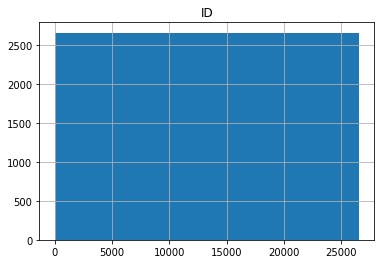

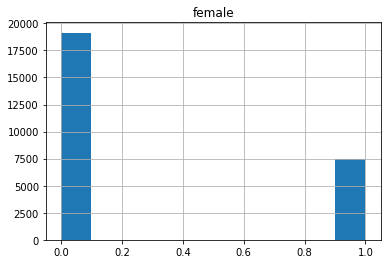

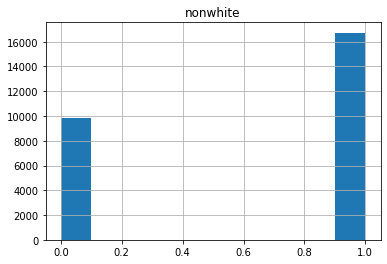

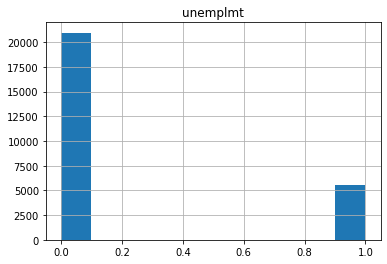

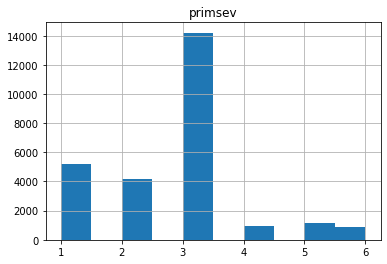

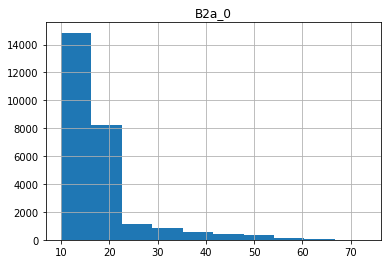

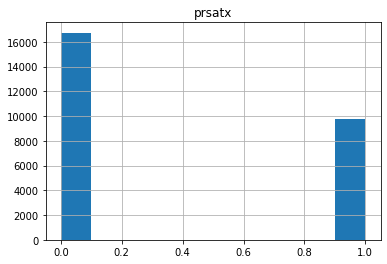

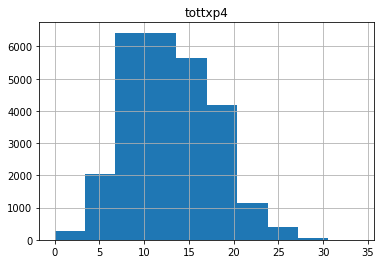

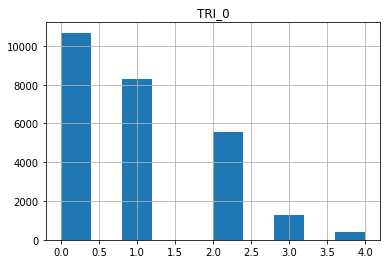

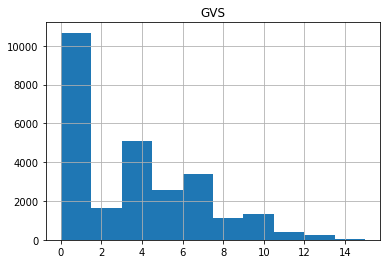

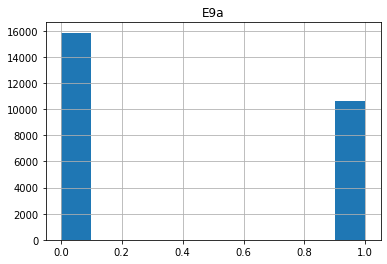

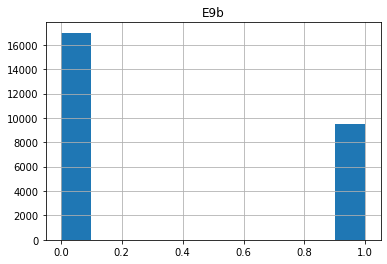

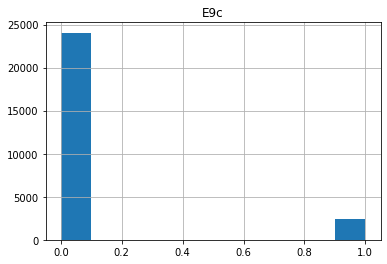

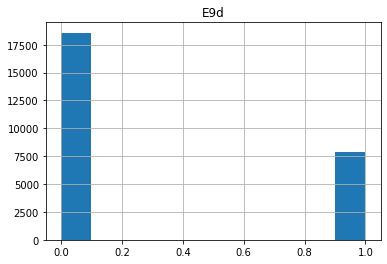

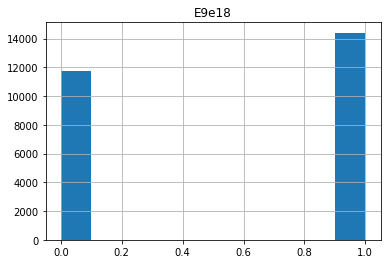

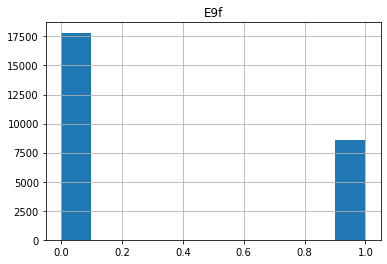

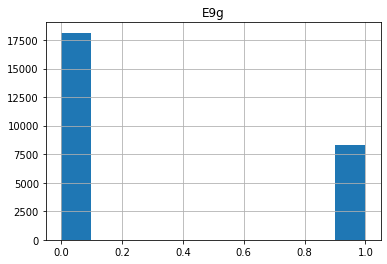

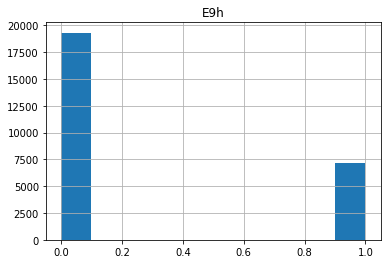

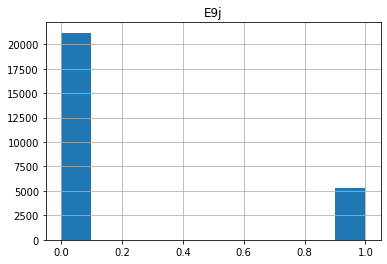

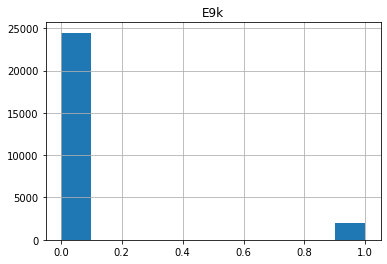

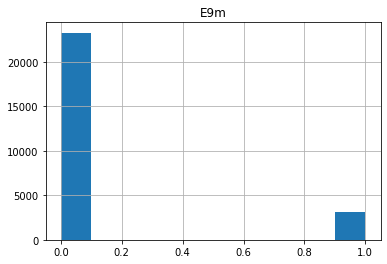

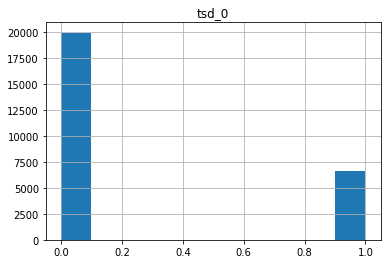

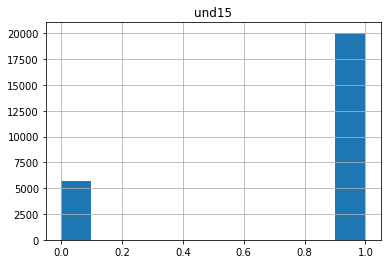

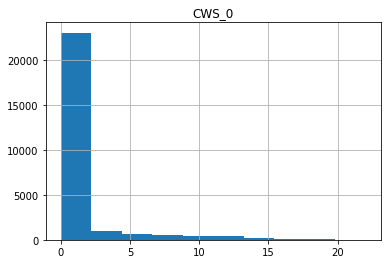

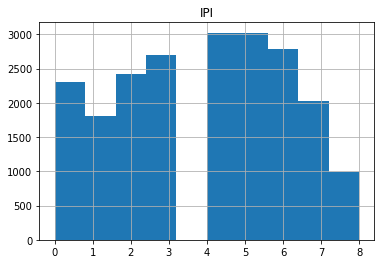

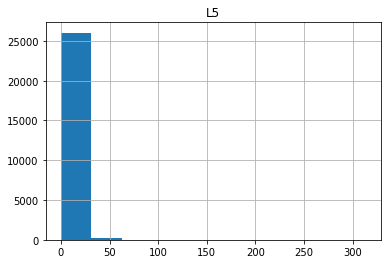

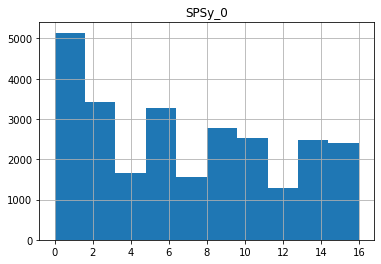

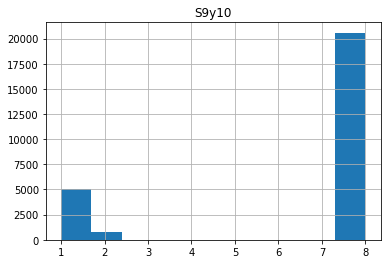

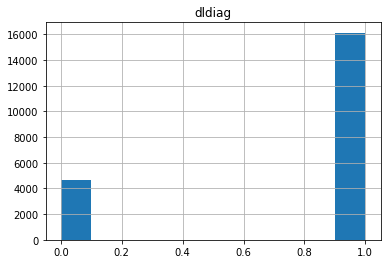

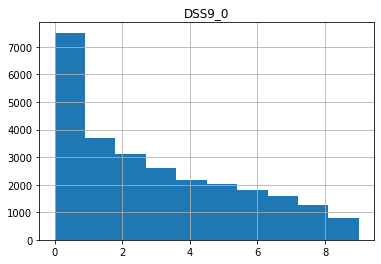

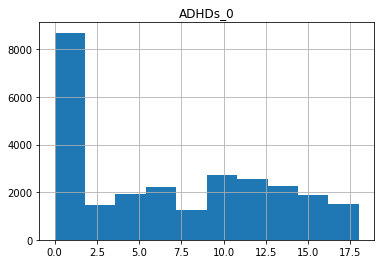

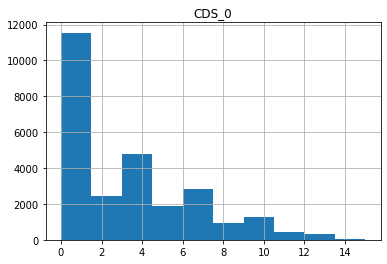

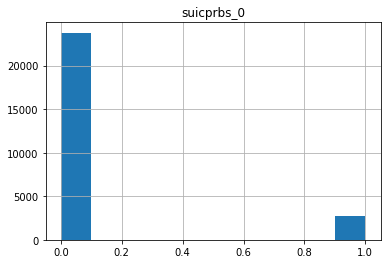

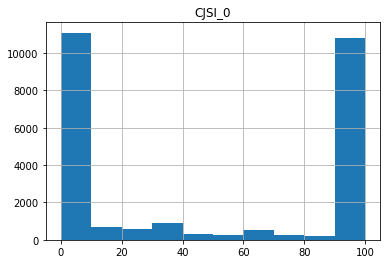

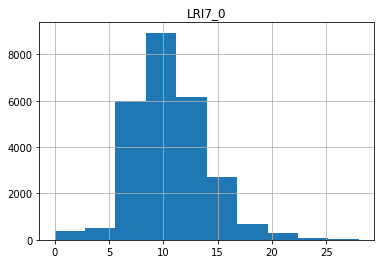

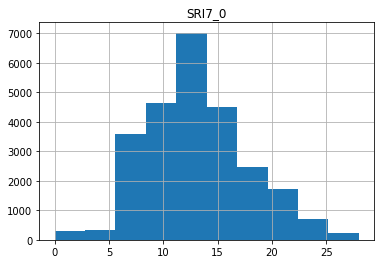

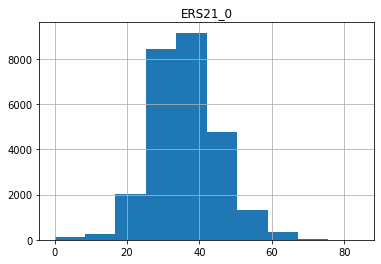

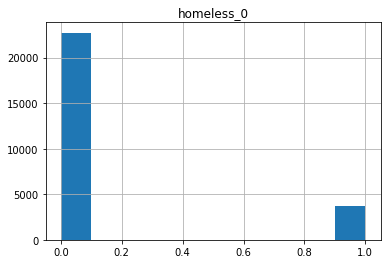

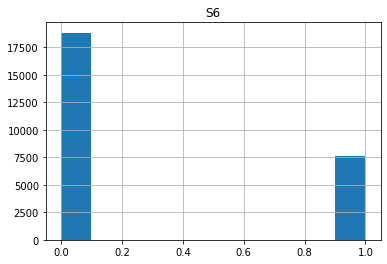

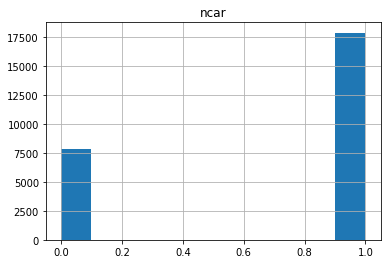

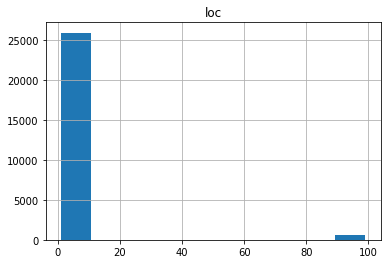

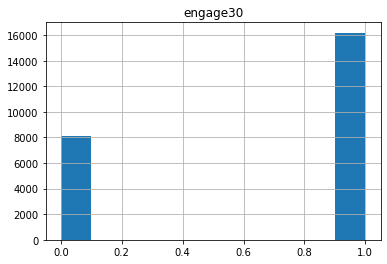

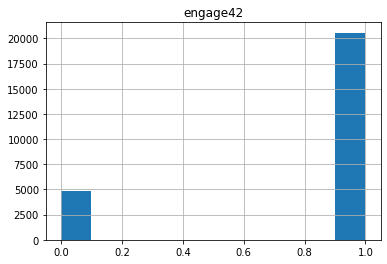

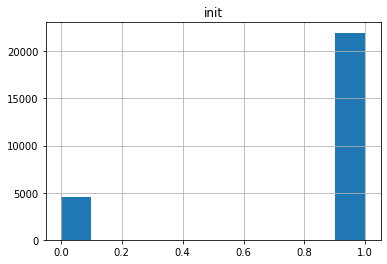

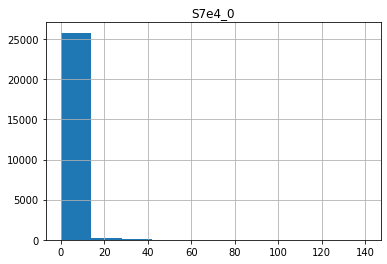

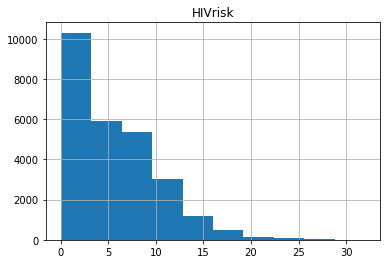

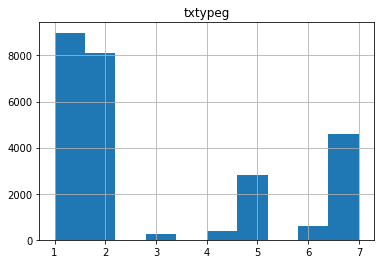

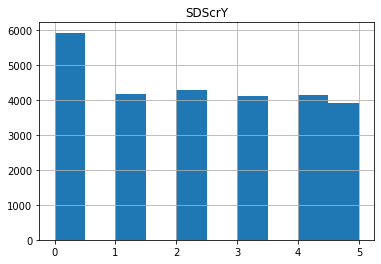

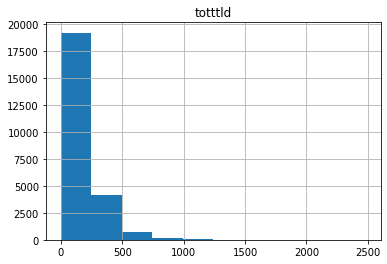

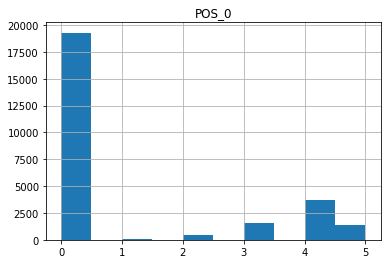

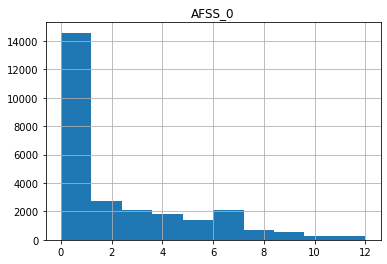

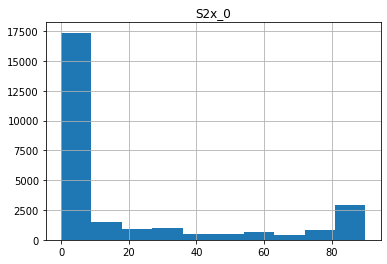

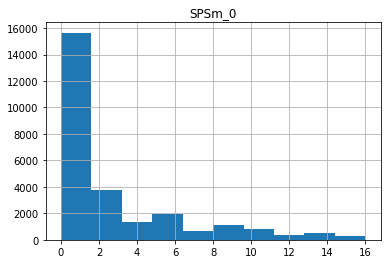

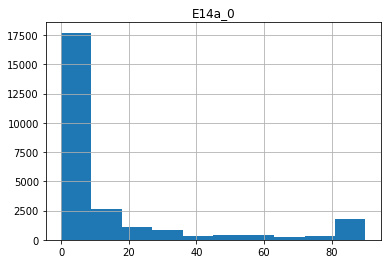

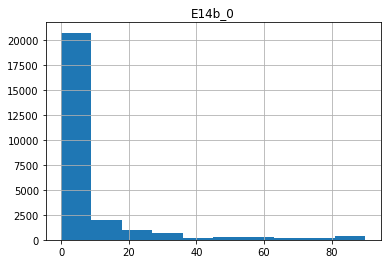

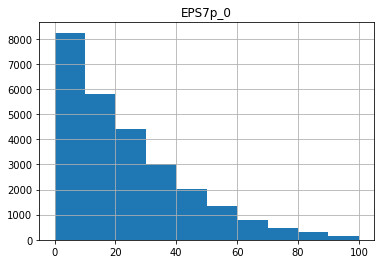

In [19]:
# visualize data histograms
for i in df.columns:
    df.hist(column=i)

In [ ]:
"""
Observations from histograms...
- binanry: most people are female (18000 female, 7500 male)
- binanry: most are non-white (10000 white, 17000 non-white)
- binanry: most are employed
- primsev has normal distribution, try one-hot encoding the values (only 6 potential values)
- B2a_0 right skewed
- binanry: prsatx mostly 0
- tottxp4 has normal distribution, numbers are also already p small so no need to normalize
- TRI_0 right skewed, also can be one-hot encoded
- GVS right skewed
- binanry: E9a mostly 0
- 
"""